In [9]:
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pylab as pylab

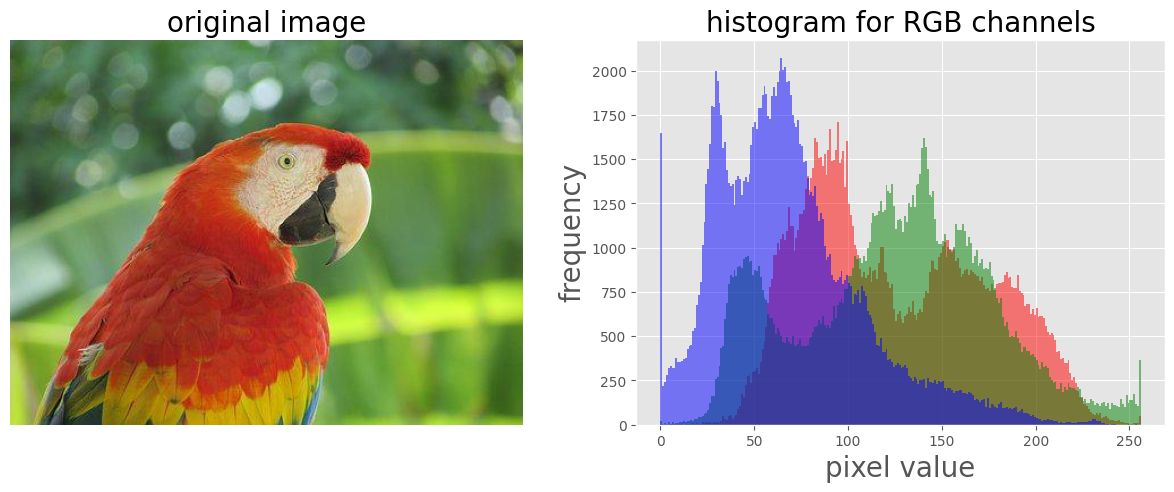

In [5]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=20), pylab.ylabel('frequency', size=20)
    pylab.title(title, size=20)
im = Image.open("D:/ĐH/Xử lý ảnh/BTL/images/parrot.png")
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121), plot_image(im, 'original image')
pylab.subplot(122), plot_hist(im_r, im_g, im_b,'histogram for RGB channels')
pylab.show()

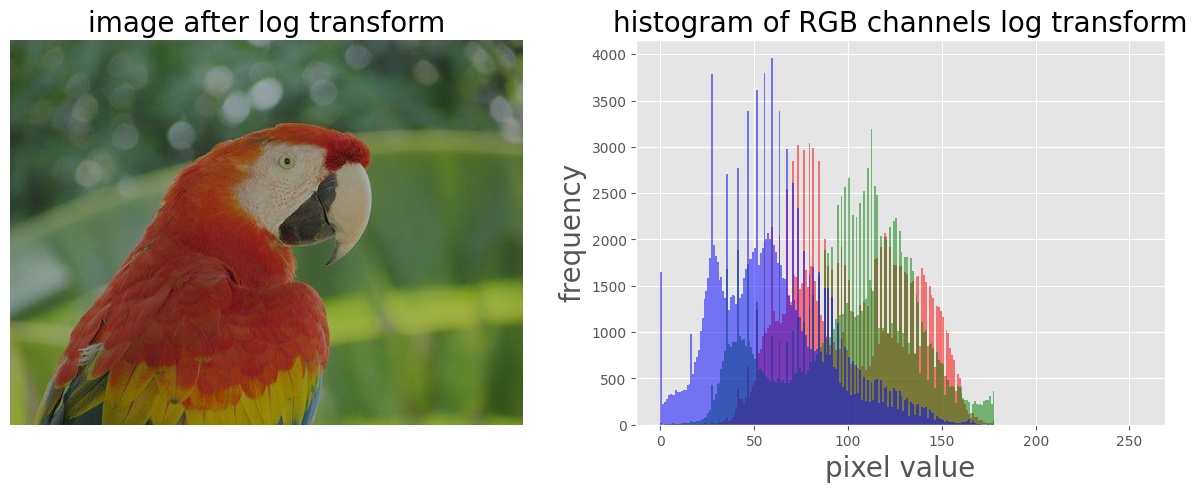

In [6]:
im = im.point(lambda i: 255*np.log(1+i/255))
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121), plot_image(im, 'image after log transform')
pylab.subplot(122), plot_hist(im_r, im_g, im_b, 'histogram of RGB channels log transform')
pylab.show()

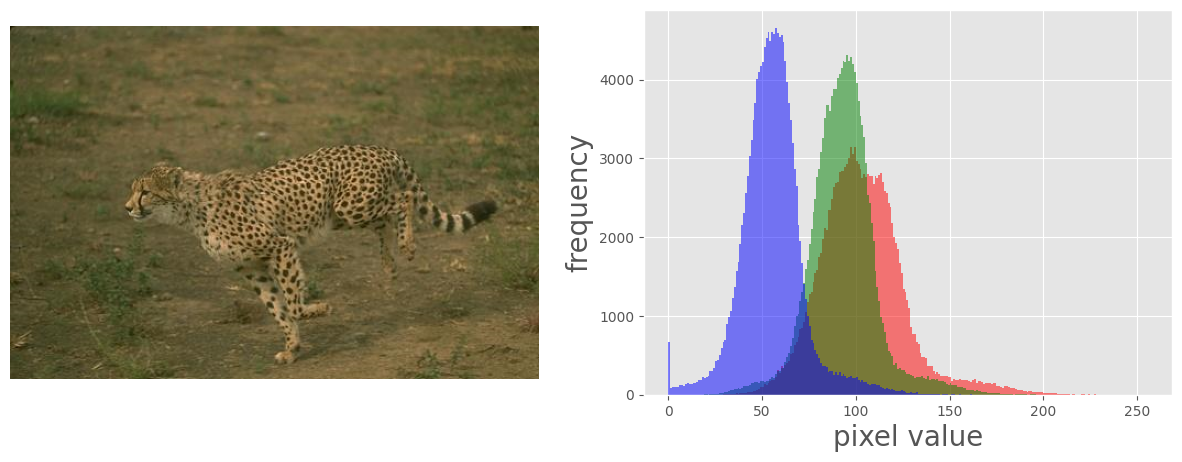

In [8]:
im = Image.open('D:/ĐH/Xử lý ảnh/BTL/images/cheetah.png')
im_r, im_g, im_b, _ = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121)
plot_image(im)
pylab.subplot(122)
plot_hist(im_r, im_g, im_b)
pylab.show()

TypeError: LogScale.__init__() got an unexpected keyword argument 'basey'

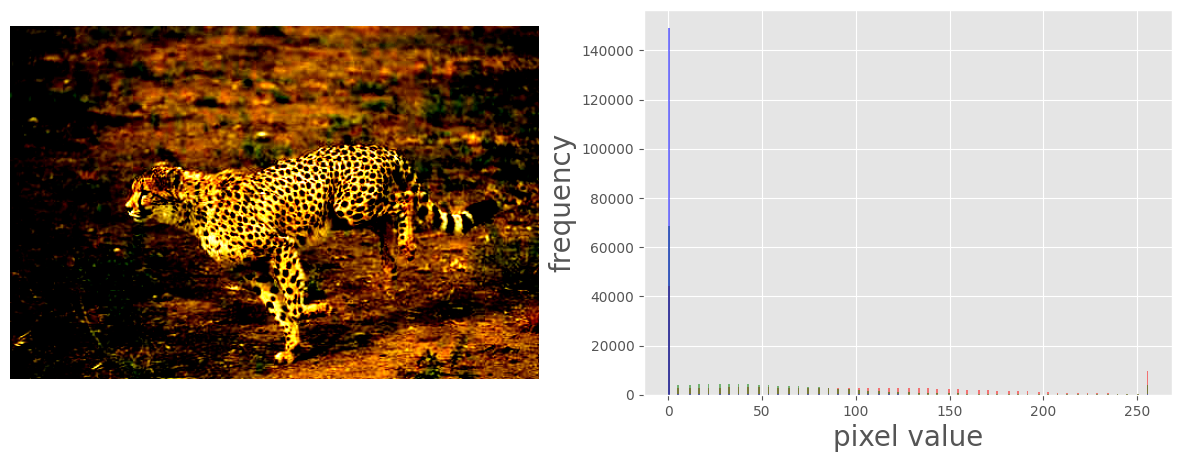

In [9]:
def contrast(c):
    return 0 if c < 70 else (255 if c > 150 else (255*c - 22950) / 48) 
im1 = im.point(contrast)
im_r, im_g, im_b, _ = im1.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121)
plot_image(im1)
pylab.subplot(122)
plot_hist(im_r, im_g, im_b)
pylab.yscale('log',basey=10)
pylab.show()

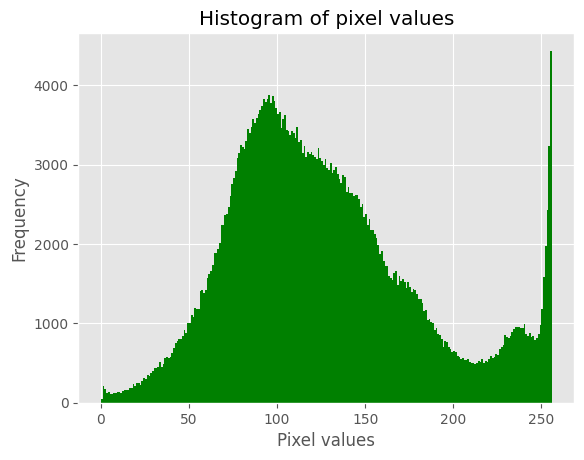

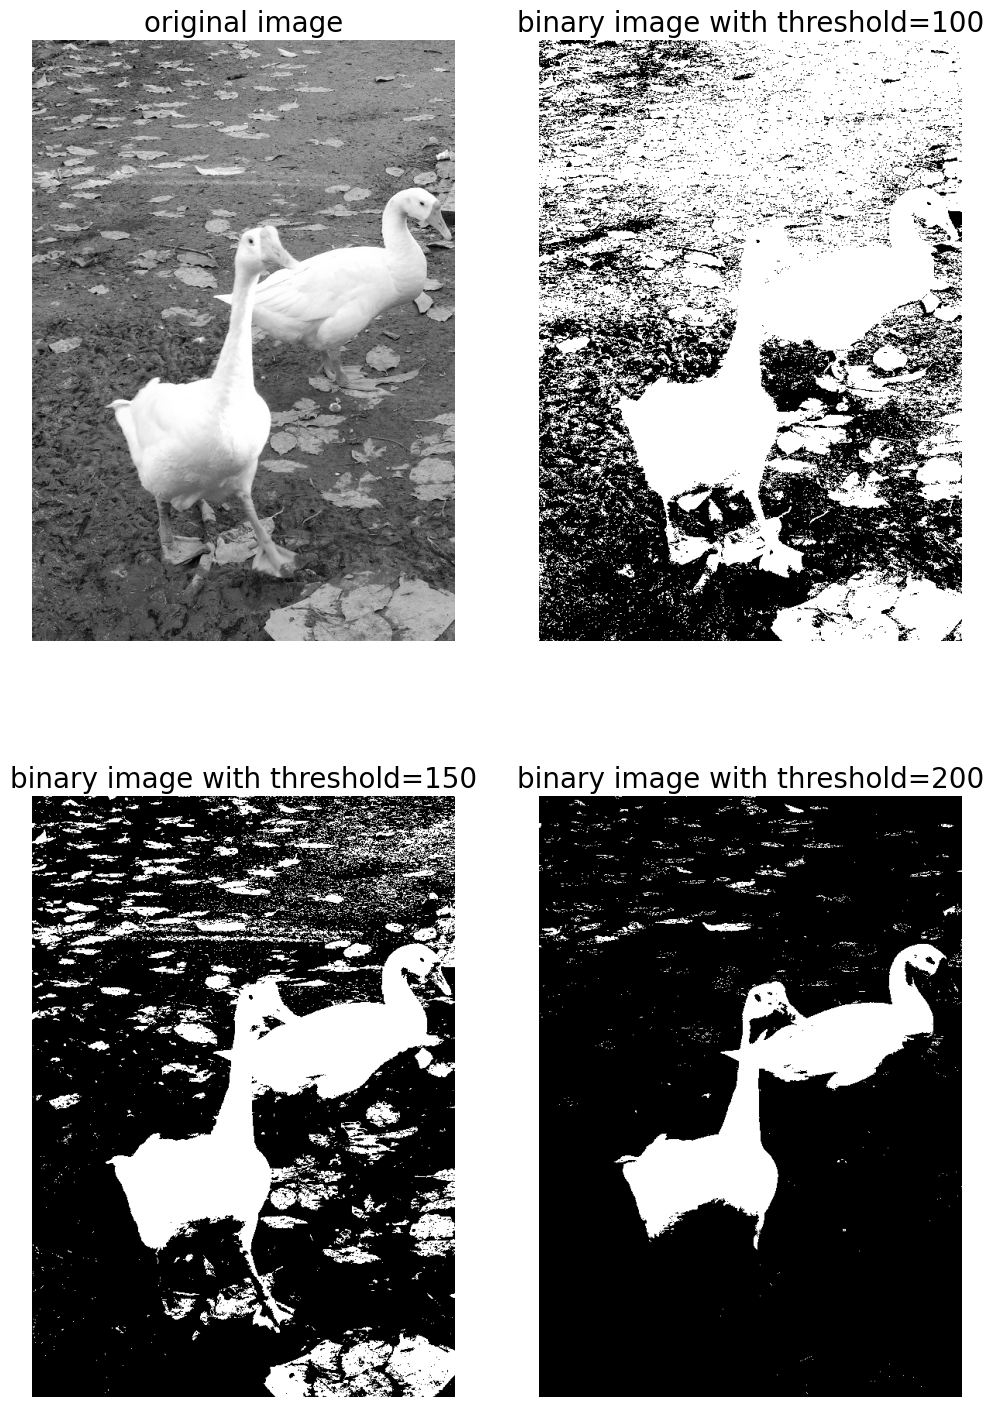

In [11]:
im = Image.open('D:/ĐH/Xử lý ảnh/BTL/images/swans.jpg').convert('L')
pylab.hist(np.array(im).ravel(), bins=256, range=(0, 256), color='g')
pylab.xlabel('Pixel values'), pylab.ylabel('Frequency'),
pylab.title('Histogram of pixel values')
pylab.show()
pylab.figure(figsize=(12,18))
pylab.gray()
pylab.subplot(221), plot_image(im, 'original image'), pylab.axis('off')
th = [0, 50, 100, 150, 200]
for i in range(2, 5):
    im1 = im.point(lambda x: x > th[i])
    pylab.subplot(2,2,i), plot_image(im1, 'binary image with threshold=' + str(th[i]))
pylab.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_36832\2519374190.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  lena = imageio.imread('D:/ĐH/Xử lý ảnh/BTL/images/lena.jpg')


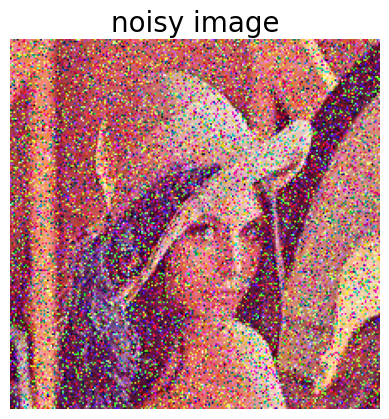

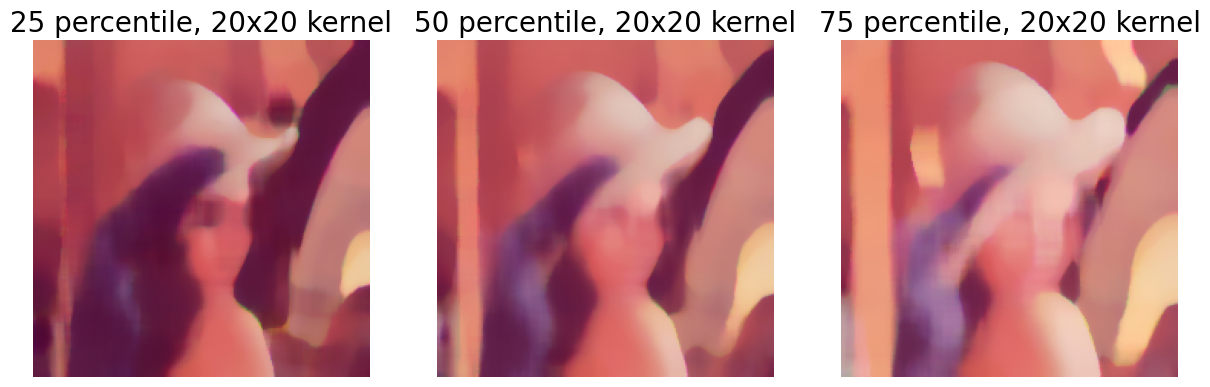

In [11]:
import imageio

# Định nghĩa hàm plot_image
def plot_image(image, title=''):
    pylab.imshow(image)
    pylab.axis('off')
    pylab.title(title, size=20)
    
lena = imageio.imread('D:/ĐH/Xử lý ảnh/BTL/images/lena.jpg')
noise = np.random.random(lena.shape)
lena[noise > 0.9] = 255
lena[noise < 0.1] = 0
plot_image(lena, 'noisy image')
pylab.show()
fig = pylab.figure(figsize=(20,15))
i = 1
for p in range(25, 100, 25):
    for k in range(5, 25, 5):
        pylab.subplot(3,4,i)
        filtered = ndimage.percentile_filter(lena, percentile=p, size=(k,k,1))
        plot_image(filtered, str(p) + ' percentile, ' + str(k) + 'x' + str(k) + ' kernel')
    i += 1
pylab.show()